# Image Classification with larger CNN

The goal of this exercise is to program a slightly larger CNN that incorporates some of the ideas that have been presented in the class. We use CIFAR-100, which is a bit more challenging than the MNIST data set, but not so much. It contains 50000 images that are labelled into 100 fine-grained classes of 20 more coarse grained classes. In order to make the task a mit more complicated we will use the fine grained classes.

The dataset is build into keras.

In [81]:
import keras
import keras.datasets
import keras.datasets.cifar100
import keras.utils
import keras.optimizers
import numpy as np
from wandb.integration.keras import WandbMetricsLogger
from keras import regularizers
import tensorflow as tf
# from tensorflow.keras import layers, regularizers
from keras import layers, regularizers

import os
os.environ["KERAS_BACKEND"] = "torch"



import wandb

import matplotlib.pyplot as plt

print(keras.__version__)

3.6.0


In [82]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

/var/folders/ft/p6xwtlq12ygfhmnytl1ngxdm0000gn/T/ipykernel_26291/3472643319.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(int(y_train[index]))


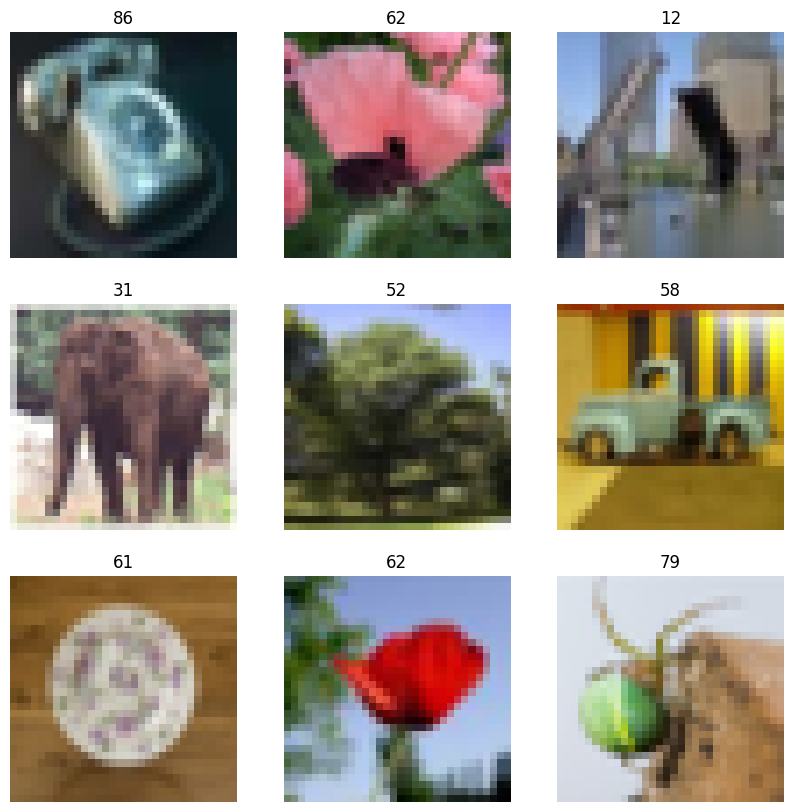

In [83]:
plt.figure(figsize=(10, 10))
for i in range(9):
    index = np.random.randint(50000)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(np.array(x_train[index]).astype("uint8"))
    plt.title(int(y_train[index]))
    plt.axis("off")

In [84]:
num_classes = 100
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [85]:
def build_model():
    inp = keras.Input(shape=(32, 32, 3))
    x = keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu")(inp)
    x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu")(x)
    x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = keras.layers.Conv2D(128, kernel_size=(3, 3), activation="relu")(x)
    #x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(100, activation='softmax')(x)

    return keras.Model(inp, x)

In [86]:
model = build_model()

In [87]:
model.summary()

Model: "functional_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_34 (InputLayer)     │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_144 (Conv2D)             │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_66 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_145 (Conv2D)             │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_67 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_146 (Conv2D)             │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_20 (Flatten)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 100)            │       204,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 298,148 (1.14 MB)

 Trainable params: 298,148 (1.14 MB)

 Non-trainable params: 0 (0.00 B)

In [88]:
batch_size = 128
epochs = 1
opt = keras.optimizers.RMSprop(learning_rate=0.01)
model = build_model()
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.0207 - loss: 4.7408 - val_accuracy: 0.0896 - val_loss: 3.9956


The performance is not bad, but also not so great. The best results without using additional data for convolutional neural networks is at about 70 percent.

In [89]:
print(history.history)

{'accuracy': [0.03708888962864876], 'loss': [4.418914318084717], 'val_accuracy': [0.08959999680519104], 'val_loss': [3.9956307411193848]}


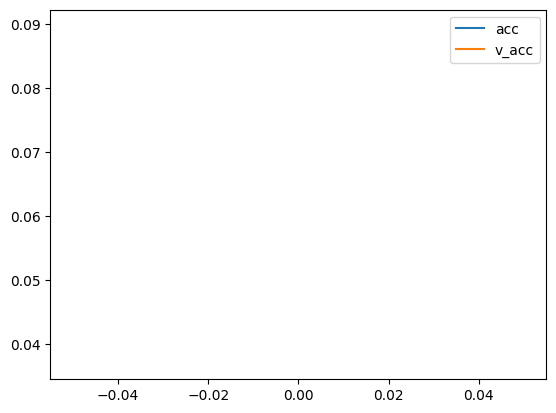

In [90]:
fig, ax = plt.subplots()
ax.plot(history.history['accuracy'], label='acc')
ax.plot(history.history['val_accuracy'], label='v_acc')
plt.legend()
plt.show()

## Exercise 1: Modern CNN

A *modern* CNN should have some of the features discussed in the lecture. Build a model that includes some or all of these:
- ResNet architecture with skip connections
- Batch Normalization
- L2 Regularisation
- Dropout

How does you model perform?

In [91]:
def build_improved_model():
    inp = tf.keras.Input(shape=(32, 32, 3))

    # Block 1
    x_res = layers.Conv2D(32, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.L2(1e-4))(inp)
    x = layers.BatchNormalization()(x_res)
    x = layers.Activation("relu")(x)
    
    x = layers.Conv2D(32, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.L2(1e-4))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    
    x = layers.Conv2D(32, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.L2(1e-4))(x)
    x = layers.BatchNormalization()(x)
    x = keras.layers.Add()([x_res, x])
    x = layers.Activation("relu")(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.SpatialDropout2D(0.25)(x)

    # Block 2
    x_res = layers.Conv2D(64, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.L2(1e-4))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    
    x = layers.Conv2D(64, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.L2(1e-4))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    
    x = layers.Conv2D(64, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.L2(1e-4))(x)
    x = layers.BatchNormalization()(x)
    x = keras.layers.Add()([x_res, x])
    x = layers.Activation("relu")(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.SpatialDropout2D(0.3)(x)

    # Block 3
    x_res = layers.Conv2D(128, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.L2(1e-4))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    
    x = layers.Conv2D(128, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.L2(1e-4))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    
    x = layers.Conv2D(128, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.L2(1e-4))(x)
    x = layers.BatchNormalization()(x)
    x = keras.layers.Add()([x_res, x])
    x = layers.Activation("relu")(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.SpatialDropout2D(0.4)(x)

    # Block 4
    x_res = layers.Conv2D(256, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.L2(1e-4))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.Conv2D(256, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.L2(1e-4))(x)
    x = layers.BatchNormalization()(x)
    x = keras.layers.Add()([x_res, x])
    x = layers.Activation("relu")(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.SpatialDropout2D(0.5)(x)

    # Global Average Pooling
    x = layers.GlobalAveragePooling2D()(x)

    # Fully Connected Layer
    x = layers.Dense(256, activation='relu', kernel_regularizer=regularizers.L2(1e-4))(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(100, activation='softmax', kernel_regularizer=regularizers.L2(1e-4))(x)

    return tf.keras.Model(inp, x)


In [92]:
model = build_improved_model()
model.summary()

Model: "functional_28"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_36      │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_150 (Conv2D) │ (None, 32, 32,    │        896 │ input_layer_36[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        128 │ conv2d_150[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_85       │ (None, 32, 32,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_151 (Conv2D) │ (None, 32, 32,    │      9,248 │ activation_85[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        128 │ conv2d_151[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_86       │ (None, 32, 32,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_152 (Conv2D) │ (None, 32, 32,    │      9,248 │ activation_86[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        128 │ conv2d_152[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_43 (Add)        │ (None, 32, 32,    │          0 │ conv2d_150[0][0], │
│                     │ 32)               │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_87       │ (None, 32, 32,    │          0 │ add_43[0][0]      │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_70    │ (None, 16, 16,    │          0 │ activation_87[0]… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spatial_dropout2d_… │ (None, 16, 16,    │          0 │ max_pooling2d_70… │
│ (SpatialDropout2D)  │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │        128 │ spatial_dropout2… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_88       │ (None, 16, 16,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_154 (Conv2D) │ (None, 16, 16,    │     18,496 │ activation_88[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │        256 │ conv2d_154[0][0]

 Total params: 1,074,276 (4.10 MB)

 Trainable params: 1,072,356 (4.09 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [93]:
import wandb

early_stopping = keras.callbacks.EarlyStopping(monitor='loss', patience=3)

# Initialize W&B project and config
wandb.init(
    project="cifar_TSM_CompVis",
    config={
        "batch_size": batch_size,
        "epochs": epochs,
        "optimizer": "Adam",
        "learning_rate": 0.01,
    },
)
batch_size = 128
epochs = 30

# Build and compile model
opt = keras.optimizers.Adam(learning_rate=0.01)
model = build_model()
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# Train the model with WandbCallback to log metrics
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1,
    callbacks=[WandbMetricsLogger(), early_stopping]
)

epoch/accuracy,▁▃▄▅▅▆▆▆▆▇▇▇▇▇▇▇▇▇▇███████████
epoch/epoch,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇███
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▆▄▄▄▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁
epoch/val_accuracy,▁▃▄▄▅▆▆▇▆▆▇▆▇▇▇▇▇█▇▇▇▇▇▇█▇██▇▇
epoch/val_loss,█▅▄▄▃▂▃▂▃▃▂▂▂▂▂▂▁▁▂▂▂▁▁▁▁▁▁▁▂▃
epoch/accuracy,0.23387
epoch/epoch,29
epoch/learning_rate,0.01
epoch/loss,3.18543
epoch/val_accuracy,0.174


Epoch 1/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.0097 - loss: 4.6258 - val_accuracy: 0.0076 - val_loss: 4.6087
Epoch 2/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.0100 - loss: 4.6074 - val_accuracy: 0.0088 - val_loss: 4.6102
Epoch 3/30
140/352 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.0102 - loss: 4.6082

KeyboardInterrupt: 

## Exercise 2: Monitoring

Monitoring the training is essential for long running training sessions. Include tensorboard or wandb in your training setup.

## Exercise 3: Data Augmentation (continued next lesson)

What else could be done to get better results? The dataset is quite small, so either another dataset could be used for pretraining, or data augmentation could be added....

In [71]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),  # Random horizontal flip
    layers.RandomRotation(0.1),  # Random rotation within 10% of the total range
    layers.RandomZoom(0.1),  # Random zoom within 10%
    layers.RandomTranslation(0.1, 0.1),  # Random translation by 10% of width and height
    layers.RandomContrast(0.1),  # Random contrast adjustment within 10%
])

In [73]:
def build_improved_model_augment():
    inp = tf.keras.Input(shape=(32, 32, 3))

    # Augment the data
    x = data_augmentation(inp)
    
    # Block 1
    x_res = layers.Conv2D(32, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.L2(1e-4))(inp)
    x = layers.BatchNormalization()(x_res)
    x = layers.Activation("relu")(x)
    
    x = layers.Conv2D(32, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.L2(1e-4))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    
    x = layers.Conv2D(32, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.L2(1e-4))(x)
    x = layers.BatchNormalization()(x)
    x = keras.layers.Add()([x_res, x])
    x = layers.Activation("relu")(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.SpatialDropout2D(0.25)(x)

    # Block 2
    x_res = layers.Conv2D(64, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.L2(1e-4))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    
    x = layers.Conv2D(64, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.L2(1e-4))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    
    x = layers.Conv2D(64, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.L2(1e-4))(x)
    x = layers.BatchNormalization()(x)
    x = keras.layers.Add()([x_res, x])
    x = layers.Activation("relu")(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.SpatialDropout2D(0.3)(x)

    # Block 3
    x_res = layers.Conv2D(128, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.L2(1e-4))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    
    x = layers.Conv2D(128, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.L2(1e-4))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    
    x = layers.Conv2D(128, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.L2(1e-4))(x)
    x = layers.BatchNormalization()(x)
    x = keras.layers.Add()([x_res, x])
    x = layers.Activation("relu")(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.SpatialDropout2D(0.4)(x)

    # Block 4
    x_res = layers.Conv2D(256, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.L2(1e-4))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.Conv2D(256, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.L2(1e-4))(x)
    x = layers.BatchNormalization()(x)
    x = keras.layers.Add()([x_res, x])
    x = layers.Activation("relu")(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.SpatialDropout2D(0.5)(x)

    # Global Average Pooling
    x = layers.GlobalAveragePooling2D()(x)

    # Fully Connected Layer
    x = layers.Dense(256, activation='relu', kernel_regularizer=regularizers.L2(1e-4))(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(100, activation='softmax', kernel_regularizer=regularizers.L2(1e-4))(x)

    return tf.keras.Model(inp, x)

In [74]:
model = build_improved_model()
model.summary()

Model: "functional_24"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_32      │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_130 (Conv2D) │ (None, 32, 32,    │        896 │ input_layer_32[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        128 │ conv2d_130[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_74       │ (None, 32, 32,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_131 (Conv2D) │ (None, 32, 32,    │      9,248 │ activation_74[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        128 │ conv2d_131[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_75       │ (None, 32, 32,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_132 (Conv2D) │ (None, 32, 32,    │      9,248 │ activation_75[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        128 │ conv2d_132[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_39 (Add)        │ (None, 32, 32,    │          0 │ conv2d_130[0][0], │
│                     │ 32)               │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_76       │ (None, 32, 32,    │          0 │ add_39[0][0]      │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_60    │ (None, 16, 16,    │          0 │ activation_76[0]… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spatial_dropout2d_… │ (None, 16, 16,    │          0 │ max_pooling2d_60… │
│ (SpatialDropout2D)  │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │        128 │ spatial_dropout2… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_77       │ (None, 16, 16,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_134 (Conv2D) │ (None, 16, 16,    │     18,496 │ activation_77[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │        256 │ conv2d_134[0][0]

 Total params: 1,074,276 (4.10 MB)

 Trainable params: 1,072,356 (4.09 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [75]:
import wandb

early_stopping = keras.callbacks.EarlyStopping(monitor='loss', patience=3)

# Initialize W&B project and config
wandb.init(
    project="cifar_TSM_CompVis",
    config={
        "batch_size": batch_size,
        "epochs": epochs,
        "optimizer": "Adam",
        "learning_rate": 0.01,
    },
)
batch_size = 128
epochs = 30

# Build and compile model
opt = keras.optimizers.Adam(learning_rate=0.01)
model = build_model()
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# Train the model with WandbCallback to log metrics
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1,
    callbacks=[WandbMetricsLogger(), early_stopping]
)

epoch/accuracy,▁▄▅▆▆▆▇▇▇▇▇▇█▇▇██████████
epoch/epoch,▁▁▂▂▂▂▃▃▃▄▄▄▅▅▅▅▆▆▆▇▇▇▇██
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▅▄▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/val_accuracy,▁▃▅▅▆▆▆▆▆▆▇▆▇▇▇▇▆▆▆▇▇▇█▇▆
epoch/val_loss,█▄▃▃▂▂▂▂▂▂▁▁▂▁▁▁▁▂▂▁▁▁▁▂▃
epoch/accuracy,0.21907
epoch/epoch,24
epoch/learning_rate,0.01
epoch/loss,3.27508
epoch/val_accuracy,0.1688


Epoch 1/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.0242 - loss: 4.4757 - val_accuracy: 0.0710 - val_loss: 4.1318
Epoch 2/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.0817 - loss: 4.0154 - val_accuracy: 0.1088 - val_loss: 3.8470
Epoch 3/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.1227 - loss: 3.7797 - val_accuracy: 0.1264 - val_loss: 3.8017
Epoch 4/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.1407 - loss: 3.6711 - val_accuracy: 0.1256 - val_loss: 3.8073
Epoch 5/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.1554 - loss: 3.6073 - val_accuracy: 0.1434 - val_loss: 3.7150
Epoch 6/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.1652 - loss: 3.5592 - val_accuracy: 0.1534 - val_loss: 3.6485
Epoch 7/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.1718 - loss: 3.5110 - val_accuracy: 0.1492 - val_loss: 3.6833
Epoch 8/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.1811 - loss: 3.4771 - val_accu